In [2]:
import re, sys
from collections import Counter
from matplotlib import pyplot
import numpy, pandas
from IPython.display import display, Markdown
import json
import os,fnmatch
from datetime import datetime


In [277]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [345]:
word_weights = load_word_weights("bingliu.csv")
word_weights

{'2-faced': -1.0,
 '2-faces': -1.0,
 'abnormal': -1.0,
 'abolish': -1.0,
 'abominable': -1.0,
 'abominably': -1.0,
 'abominate': -1.0,
 'abomination': -1.0,
 'abort': -1.0,
 'aborted': -1.0,
 'aborts': -1.0,
 'abrade': -1.0,
 'abrasive': -1.0,
 'abrupt': -1.0,
 'abruptly': -1.0,
 'abscond': -1.0,
 'absence': -1.0,
 'absent-minded': -1.0,
 'absentee': -1.0,
 'absurd': -1.0,
 'absurdity': -1.0,
 'absurdly': -1.0,
 'absurdness': -1.0,
 'abuse': -1.0,
 'abused': -1.0,
 'abuses': -1.0,
 'abusive': -1.0,
 'abysmal': -1.0,
 'abysmally': -1.0,
 'abyss': -1.0,
 'accidental': -1.0,
 'accost': -1.0,
 'accursed': -1.0,
 'accusation': -1.0,
 'accusations': -1.0,
 'accuse': -1.0,
 'accuses': -1.0,
 'accusing': -1.0,
 'accusingly': -1.0,
 'acerbate': -1.0,
 'acerbic': -1.0,
 'acerbically': -1.0,
 'ache': -1.0,
 'ached': -1.0,
 'aches': -1.0,
 'achey': -1.0,
 'aching': -1.0,
 'acrid': -1.0,
 'acridly': -1.0,
 'acridness': -1.0,
 'acrimonious': -1.0,
 'acrimoniously': -1.0,
 'acrimony': -1.0,
 'adamant

In [283]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [284]:


datetime_object = datetime.strptime('2019-05-07', '%Y-%M-%d')
datetime_object

datetime.datetime(2019, 1, 7, 0, 5)

In [363]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            date=datetime.strptime(line["year"], '%Y-%M-%d')
            title=line['title']
            album=line['album']
            if album in ['Get Well Soon...','Kon the Louis Vuitton Don','I’m Good']:
#                 print (album)
                album="The College Dropout"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            elif album in ['Can’t Tell Me Nothing']:
#                 print (album)
                album="Late Registration"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            else:
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
    return paragraphs

In [346]:
# def load_album(text_file):

#     ## Here's an example of a simple pattern defining a word token. 
#     word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

#     ## Now look at the actual documents. We'll create a list with one object per text segment.
#     paragraphs = []
#     with open(text_file) as json_file:
#         data = json.load(json_file)
# #         print (type(data))
#     ## here's where we actually read the file
# #     with open(text_file, encoding="utf-8") as file:
# #         print (type(file))
#         ## This block reads a file line by line.
#         for line in data["songs"]:
# #             print (line)
# #             print (type(line))
# #             print (line[0])
#             date=datetime.strptime(line["year"], '%Y-%M-%d')
#             title=line['title']
#             album=line['album']
#             line = line['lyrics'].rstrip()
# #             print (line)
#             tokens = word_pattern.findall(line)
#             tokens=[x.lower() for x in tokens]
# #             print (tokens)
# #             ## turn a list into a word->count map
#             paragraph_counts = Counter(tokens)
        
# #             ## create the paragraph object, with the original text, 
# #             ##  the word counts, and the total score.
# #             print (line['title'])
#             paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
#                                'score': score_counts(paragraph_counts, word_weights) })

#     return paragraphs

In [347]:
#for one album
songs = load_album("../male_lyrics/Lyrics_Tyler,TheCreator{.Igor.json")

In [348]:
songs

[{'title': 'IGOR’S THEME',
  'album': 'IGOR',
  'text': "What, what, what, what, what, what, what, what, what, what?\nUh!\nRunnin', runnin’, runnin', runnin'\nUh!\nHeaven, heaven (Ooh)\nHe’s coming\n\nRidin' 'round town, they gon' feel this one\nRidin' 'round town, they gon' feel this one\nRidin' ’round town, they gon’ feel this one\nRidin', ridin’ 'round town, they gon' feel this one\nGot my, got my, got my, got my eyes open\nGot my, got my, got my eyes open\nGot my, got my, got my, got my eyes open\nGot my eyes open\n\nOh, yeah (What)\nOh-oh-oh, yeah\nHe's comin’\nRunnin', runnin', runnin', runnin', runnin', runnin'\nWhat, what, what, what, what, what, what, what, what, what?\nHe's comin'\n\nRidin' 'round town, they gon' feel this one (They gon' feel this one)\nRidin' 'round town, they gon' feel this one\nRidin' 'round town, they gon' feel (They gon' feel this one)\nRidin', ridin' 'round town, they gon' feel this one, oh\n(Got my eyes open)\nI'm ridin', I'm ridin'\n(Got my, got my, g

In [349]:
sorted_song = sorted(songs, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_song[0:9]:
    print("{}\n{}".format(song['score'], song['text']))

## ... and the 10 most positive
for song in sorted_song[-10:]:
    print ()
    print (song['title'])
    print("{}\n{}".format(song['score'], song['text']))
    
#smoothing parameter?

-0.04155844155844156
For real, for real this time
For real, for real, for real this time
Bitch, I cannot fall short
For real, for real, for real this time (Yeah, yeah)
For real, for real, for real this time

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, your love be shakin’ me up
And it's making my heart break
'Cause you make my earth quake
Oh, you make my earth quake (Earthquake, ooh)
Riding around, your love be shakin’ me up
And it's making my heart break

Don't leave, it's my fault
Don't leave, it's my fault
Don't leave, it's my fault (Girl)
’Cause when it all comes crashing down I’ll need you

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, you’re telling me something is bad
And it's making my heart break
'Cause you make my earth quake, oh, you make my earth quake
(Earth quake, yeah)
Riding around, your love be shakin' me up
And it’s making my heart break (You already know)

We ain't gotta ball, D. Rose, huh
I don't give a fuck 

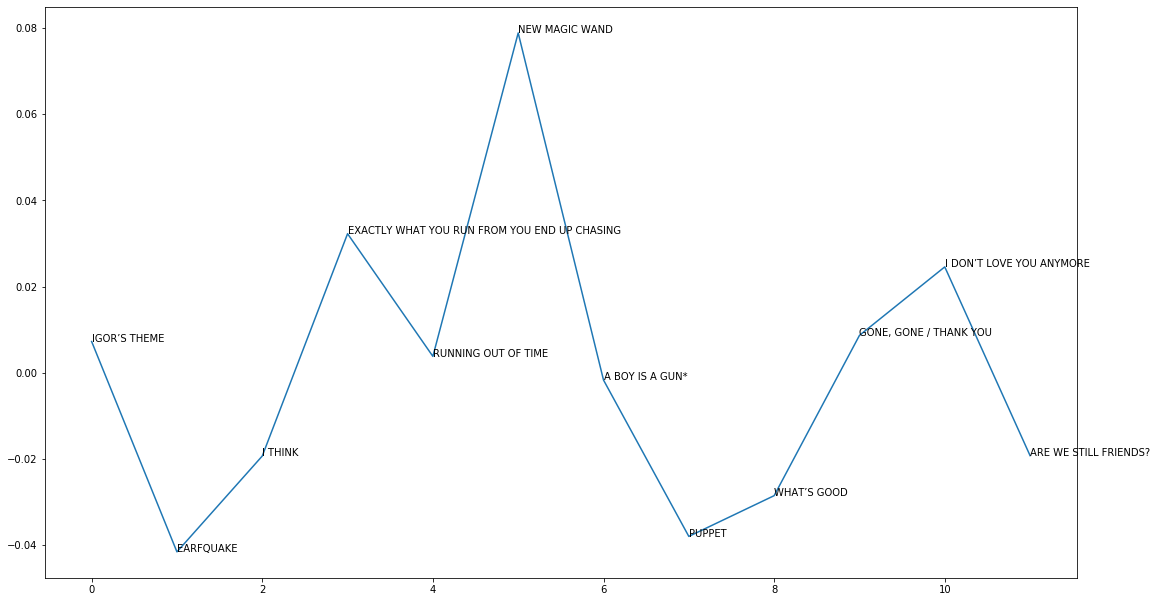

In [350]:
sentiment_scores = numpy.array([p["score"] for p in songs])
title = numpy.array([p["title"] for p in songs])
# pyplot.figure(figsize=(20, 5))
# pyplot.plot(sentiment_scores)
# pyplot.show()

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
    ax.annotate(title[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [351]:
def find_all(name, path):
    l={}
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
#             print (filename)
#             print (load_album("../"+filename)[0]['release_date'])
            l[filename]=load_album("../male_lyrics/"+filename)[0]['release_date']
#     sorted_songs_artist = sorted(l, key=lambda x: x["release_date"])    
    l={k: v for k, v in sorted(l.items(), key=lambda item: item[1])}
    print (list(l.keys()))
    sortedl=list(l.keys())
    return sortedl

In [352]:
find_all("Tyler","../male_lyrics")

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


['Lyrics_Tyler,TheCreator{.Bastard.json',
 'Lyrics_Tyler,TheCreator{.Goblin.json',
 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json',
 'Lyrics_Tyler,TheCreator{.Flower-Boy.json',
 'Lyrics_Tyler,TheCreator{.Igor.json']

In [353]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../male_lyrics")
    
    
    for file in filenames:
         complete.extend(load_album("../male_lyrics/"+file))
      
    
    return complete

In [354]:
# Every song and theire score for one artist in a dictionary
completeartist=load_artist("Tyler,")
# print (completeartist)

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


In [355]:
completeartist

[{'title': 'Bastard',
  'album': 'Bastard',
  'text': 'Yo, fuck 2DopeBoyz and fuck Nah Right\nAnd any other fuck-nigga-ass blog that can\'t put an 18 year old nigga\nMaking his own fucking beats, covers, videos and all that shit\nFuck you post-Drake-ass cliche-jerking, LA-slauson rapping\nFuck-nigga-ass Hypebeast niggas, now back to the album\n\nWell, Tyler, hi, I\'m Dr. TC and um, I\'m guessing that your teacher sent you here to talk \'cause you were misbehaving\nUm, it\'s gonna be three sessions: today, tomorrow, and the next day\nSo, just tell me something about yourself...\nWell, look, if you don\'t talk, I mean, these sessions are going to go slower\n\nThis is what the devil plays before he goes to sleep\nSome food for thought? This food for death, go ahead and fucking eat\nMy father\'s dead, well I don\'t know, we\'ll never fucking meet\nI cut my wrist and play piano cause I\'m so depressed\nSomebody call the pastor, this bastard is so possessed\nThis meeting just begun, nigga I\

In [356]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.22889305816135083
Oh, shit (Swag)
Three icy ass niggas from Odd Future doin' some crazy shit (Bitch)
By the way, we do punch bitches, huh

I'm swagging bitch (Swag), I'm iced out (Iced out)
Oh, you mad, bitch? (Bitch) 'Cause I'm laying on the couch (Woo)
Smoke a blunt, fuck a bitch in the butt, I'm bossing (Bow, bow)
Don't give a fuck, I never roll Slauson
I'm fly bitch, I should poke you in your eye bitch
Got the burner bitch, bow, bow (Bow)
You dead bitch, I'm hot as fuck
I ain't never cold, but I'm icy bitch (Woo)

My bitch suck dick like she suck dick
My bitch suck dick like she suck dick (Bow, bow, bow)
My bitch suck dick like (What) she suck dick
My bitch suck dick like she suck dick (Bow, bow)

Got the bops in the house, socking bitches in they mouth (Bitch)
See my neck? Iced the fuck out (I'm getting money, nigga)
She at the fucking mall, 40 bitches on my nutsack
I pulled up on a mothafuckin' unicorn (I'm getting ponies, nigga)
Wolf Gang, nigga
Scream that 'till they motherf

In [357]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.007246376811594203
IGOR
IGOR’S THEME

What, what, what, what, what, what, what, what, what, what?
Uh!
Runnin', runnin’, runnin', runnin'
Uh!
Heaven, heaven (Ooh)
He’s coming

Ridin' 'round town, they gon' feel this one
Ridin' 'round town, they gon' feel this one
Ridin' ’round town, they gon’ feel this one
Ridin', ridin’ 'round town, they gon' feel this one
Got my, got my, got my, got my eyes open
Got my, got my, got my eyes open
Got my, got my, got my, got my eyes open
Got my eyes open

Oh, yeah (What)
Oh-oh-oh, yeah
He's comin’
Runnin', runnin', runnin', runnin', runnin', runnin'
What, what, what, what, what, what, what, what, what, what?
He's comin'

Ridin' 'round town, they gon' feel this one (They gon' feel this one)
Ridin' 'round town, they gon' feel this one
Ridin' 'round town, they gon' feel (They gon' feel this one)
Ridin', ridin' 'round town, they gon' feel this one, oh
(Got my eyes open)
I'm ridin', I'm ridin'
(Got my, got my, got my eyes open)
Oh, yeah
(Got my, got my eye

In [359]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
Bastard,15.0,-0.033910,0.035552,-0.119481,-0.044497,-0.018182,-0.013949,0.000000
Cherry Bomb,14.0,-0.018370,0.037026,-0.090559,-0.030190,-0.020751,-0.009470,0.083333
Flower Boy,14.0,-0.002421,0.016926,-0.033661,-0.013646,-0.002616,0.009214,0.025114
Goblin,17.0,-0.061759,0.066922,-0.228893,-0.063474,-0.047041,-0.030534,0.006079
IGOR,12.0,0.000589,0.034013,-0.041558,-0.021623,0.001055,0.012639,0.078838


['Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard'
 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard'
 'Bastard' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Goblin' 'Goblin' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb'
 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb'
 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb'
 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy'
 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy'
 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy' 'IGOR' 'IGOR' 'IGOR'
 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR']


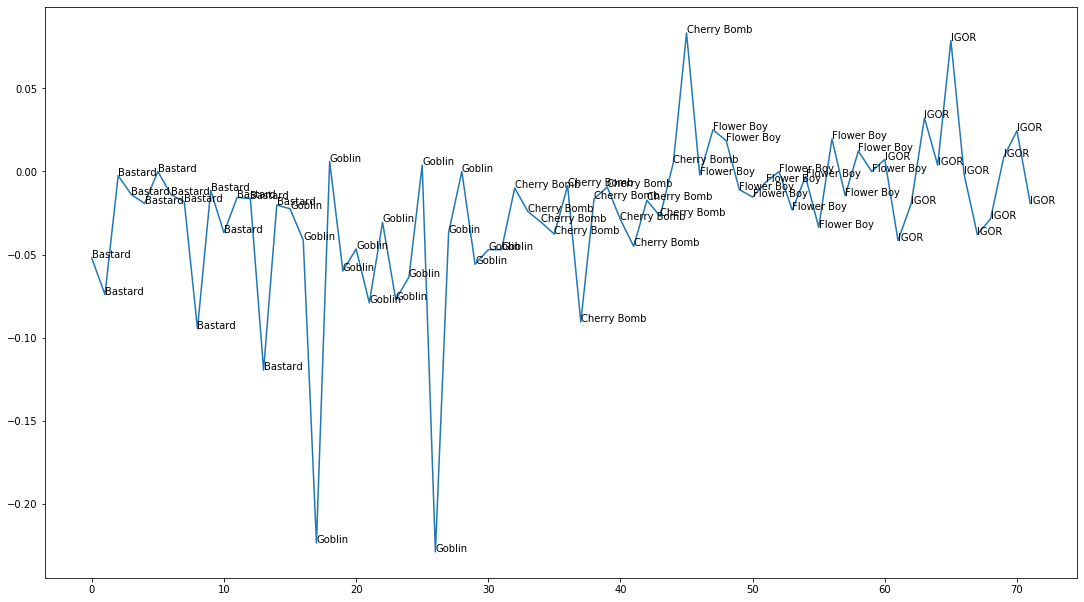

In [360]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

Next Steps?-
playcount vs sentiment score for top 10 scores

In [265]:
completeartist=load_artist("Frank")

['Lyrics_FrankOcean{.nostalgia-ULTRA.json', 'Lyrics_FrankOcean{.Channel-Orange.json', 'Lyrics_FrankOcean{.Endless.json', 'Lyrics_FrankOcean{.Blonde.json']


In [266]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.07692307692307693
You don't know how little you matter until you're all alone
In the middle of Arkansas with a little rock left in that glass dick
Used to date a blonde, you used to hit it raw
'Cause she was and you are madly involved, madly involved

Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and broke your home
Crack rock, crack rock
Crack rock, crack rock
Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and broke your home
Crack rock, crack rock
Crack rock, crack rock

You're shuckin' and jivin', stealin' and robbin'
To get the fixing that you're itching for
Your family stopped inviting you to things
Won't let you hold their infant
You used to to get a little cut-up from time to time
But the freaks ain't trying to sleep with cracky

Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and you broke your home
Crack rock
Crack rock, crack rock

Crooked cop

In [267]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.030303030303030304
Blonde 
White Ferrari

Bad luck to talk on these rides
Mine on the road, your dilated eyes watch the clouds float
White Ferrari, had a good time
(Sweet 16, how was I supposed to know anything?)
I let you out at Central
I didn't care to state the plain
Kept my mouth closed, we're both so familiar
White Ferrari, good times
Stick by me, close by me
You were fine, you were fine here
That's just a slow body
You left when I forgot to speak
So I text the speech, lesser speeds, Texas speed, yes
Basic takes its toll on me, 'ventually, 'ventually, yes
Ahh, on me 'ventually, 'ventually, yes
I care for you still and I will forever
That was my part of the deal, honest
We got so familiar
Spending each day of the year
White Ferrari, good times
In this life (life), in this life (life)
One too many years
Some tattooed eyelids on a facelift
(Thought you might want to know now)
Mind over matter is magic, I do magic
If you think about it, it'll be over in no time
And that's life
I'm 

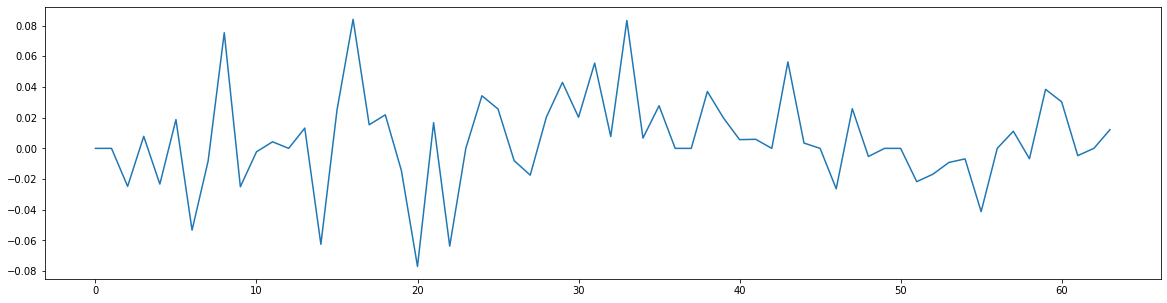

In [268]:

# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
sentiment_scores = numpy.array([p["score"] for p in completeartist])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

In [313]:
completeartist=load_artist("Childish")

['Lyrics_ChildishGambino{.Culdesac.json', 'Lyrics_ChildishGambino{.I-Am-Just-a-Rapper.json', 'Lyrics_ChildishGambino{.Camp.json', 'Lyrics_ChildishGambino{.Because-the-Internet.json', 'Lyrics_ChildishGambino{.STN-MTN-Kauai.json', 'Lyrics_ChildishGambino{.Awaken-My-Love.json', 'Lyrics_ChildishGambino{.Summer-Pack.json']


In [314]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.06563706563706563
Welcome to the culdesac, this is where the street ends
I am just a rapper, I ain't got the time for speakin'
Nigga stay weak like tornado and a tree branch
I never have a weak day, my life's a long weekend
Fuckin' with ya raw, bitch, my mouth should get tested
Sleepin' on a nigga, hope you feel well rested
Gambino stay on, can't nobody pull the cord out
A nigga fucked up, like a hang gliding whore house
Sick boy, yeah, the clique on deck
Yes, I rap absurd, got the game upset
And they rap about the jewelry, the weed they smoke
And I rap about my life, and niggas think it's a joke, nah
I only put real on a nigga
Bitches see the money, try and steal on a nigga
Yes, I'm on fire, you can feel it on a nigga
Step away from the heat; they Shaquillin' on a nigga
Treat niggas like pussy, go hard on 'em
Watch the swagga get swiped like a card, bottom
The swag's unique, I don't even worry 'bout 'em
I got the tortoise shell frames and the argyle
You wouldn't think from the thin

In [315]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.03571428571428571
I AM JUST A RAPPER
The Truth (Goth Star)

Mr. DNA, flow so Jurassic
Clumsy archeologist about to drop a classic
Damn right we got a t-rex, I paid for that in plastic
Clumsy archeologist about to drop a classic
Mistake still burning but I'm learning like a raptor
Take what I'm given make it work like an adapter
Make short work of her, then I will adapt her
Critics all agree it was the work of a master
At last my success will match my fatigue
And at last I'll send my children to an ivy league
In the masks from The Strangers, freak the whole place out
Get your glasses on, girl, geek your whole face out
Don't open up your mouth unless to let something great out
And that's not a beef, that's just a peek at the steakhouse
A week at my maid's house to recharge my battery
Then I'll be right back on top like Slattery
You know from Sterling and Cooper
If she's paid out then I will recoup her
And if she's paid out then I will invest
And if she's really played out then I will 

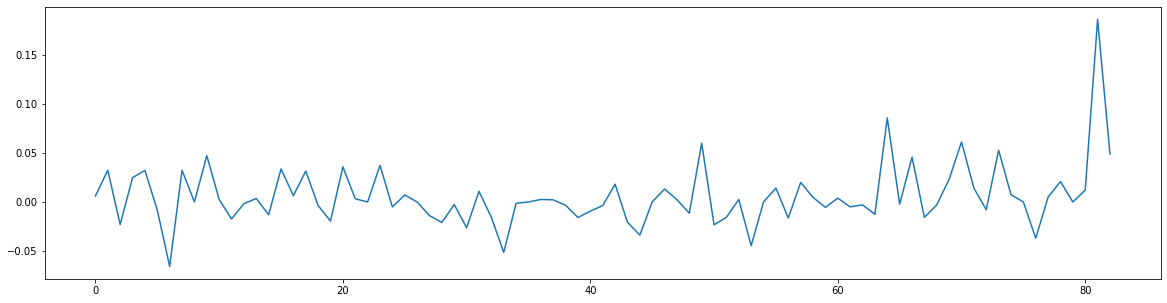

In [316]:

# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
# print (sorted_songs_artist)
sentiment_scores = numpy.array([p["score"] for p in completeartist])
# for x in completeartist:
#     print (x["title"],x['album'])
pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

In [364]:
completeartist=load_artist("Kanye")

Late Registration change
The College Dropout change
The College Dropout change
The College Dropout change
The College Dropout change
['Lyrics_KanyeWest{.The-College-Dropout.json', 'Lyrics_KanyeWest{.Late-Registration.json', 'Lyrics_KanyeWest{.Graduation.json', 'Lyrics_KanyeWest{.808s-Heartbreak.json', 'Lyrics_KanyeWest{.My-Beautiful-Dark-Twisted-Fantasy.json', 'Lyrics_KanyeWest{.Yeezus.json', 'Lyrics_KanyeWest{.The-Life-of-Pablo.json', 'Lyrics_KanyeWest{.ye.json', 'Lyrics_KanyeWest{.Jesus-is-King.json']
The College Dropout change
The College Dropout change
The College Dropout change
The College Dropout change
Late Registration change


In [365]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))


-0.07692307692307693
Every knee shall bow
Every tongue confess
Jesus is Lord
Jesus is Lord
Every knee shall bow
Every tongue confess
Jesus is Lord
Jesus is Lord
-0.07531380753138076
Turn me up!

Step up in this bitch like (Turn me up!)
I'm the one your bitch like
Yeah I'm the one your bitch like (Turn me up!)
And I be talkin' shit like
I ain't scared to lose a fistfight (Turn me up!)
And she grabbin' on my, like
She wanna see if it'll fit right (Turn me up!)
That's just the wave

(Yeah) Waves don't die
Let me crash here for the moment, yeah
I don't need to own it
No lie
Waves don't die, baby
Let me crash here for a moment
Baby, I don't, I don't need to own you
(Yeah, yeah, yeah, yeah) (Turn me up!)

Sun don't shine in the shade, ugh (Turn me up!)
Bird can't fly in a cage, ugh (Turn me up!)
Even when somebody go away (Turn me up!)
The feelings don't really go away
That's just the wave

(Yeah) Waves don't die
Let me crash here for the moment
I don't need to own it
No lie
Waves don't die,

In [366]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.057971014492753624
Late Registration
Wake Up Mr. West

Oh, ho-ho-ho!
I knew I was gon' see, I knew I was gon' see you again! Knew I was gon' see you again!
Where your goddamn book bag at?
Always carryin' that lil' book bag, nobody wants to see that!
Goddamn 4th grader, sit your ass down!
He wanna play it again like he got somethin' else to do
You ain't got somethin' else to do!
You ain't doin' nothin' wit' your life, notin' wit' your life!
You think this is?
You better look at me when I'm talkin' to you!
You think this shit easy, don't you?
You think this is promised!
Well ain't nothin' promised to you!
Look at my face, do I got a promised face?
Does it look like I promised you anything?
Kanye, nigga-is you snorin' in my class?
Wake up Mr. West!

0.058823529411764705
808s & Heartbreak
Street Lights

Let me know
Do I still got time to grow?
Things ain't always set in stone
That be known let me know
Let me...

Seems like street lights, glowing, happen to be
Just like moments, passing,

['The College Dropout' 'The College Dropout' 'The College Dropout'
 'The College Dropout' 'The College Dropout' 'The College Dropout'
 'The College Dropout' 'The College Dropout' 'The College Dropout'
 'The College Dropout' 'The College Dropout' 'The College Dropout'
 'The College Dropout' 'The College Dropout' 'The College Dropout'
 'The College Dropout' 'The College Dropout' 'The College Dropout'
 'The College Dropout' 'The College Dropout' 'Late Registration'
 'Late Registration' 'Late Registration' 'Late Registration'
 'The College Dropout' 'Late Registration' 'Late Registration'
 'Late Registration' 'Late Registration' 'Late Registration'
 'Late Registration' 'The College Dropout' 'Late Registration'
 'Late Registration' 'Late Registration' 'Late Registration'
 'Late Registration' 'Late Registration' 'Late Registration'
 'Late Registration' 'Late Registration' 'Late Registration'
 'Late Registration' 'Graduation' 'Graduation' 'Graduation' 'Graduation'
 'Graduation' 'Late Registrat

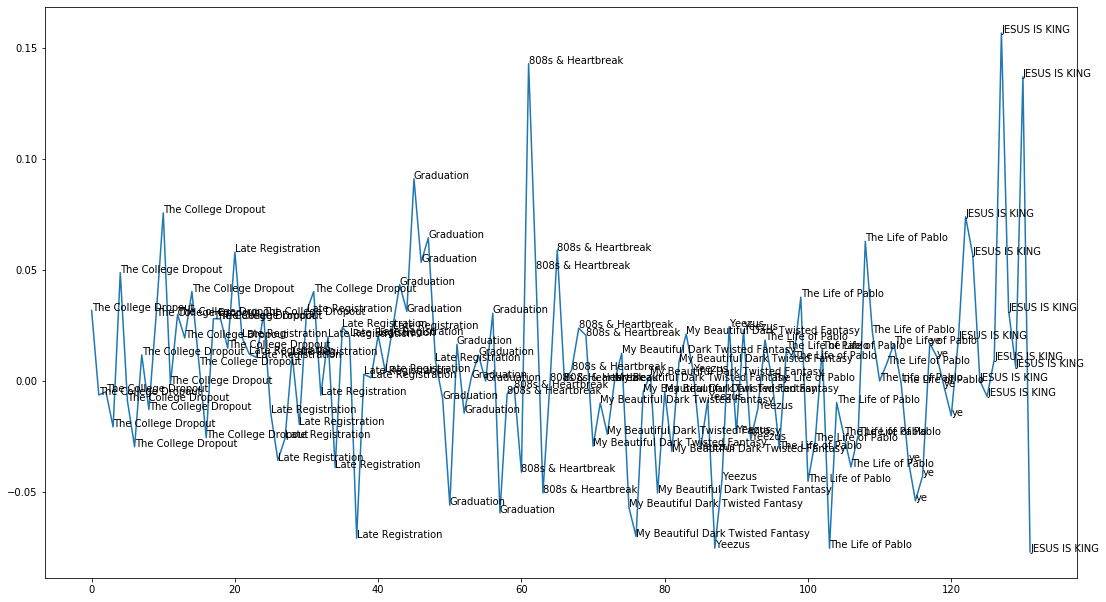

In [367]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [317]:
completeartist=load_artist("Kendrick")

['Lyrics_KendrickLamar{.Overly-Dedicated.json', 'Lyrics_KendrickLamar{.Section-80.json', 'Lyrics_KendrickLamar{.good-kid-m-A-A-d-city.json', 'Lyrics_KendrickLamar{.To-Pimp-a-Butterfly.json', 'Lyrics_KendrickLamar{.DAMN.json']


In [329]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print ()
    print (song)
    print (song['title'])

    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


{'title': 'Night of the Living Junkies', 'album': 'Overly Dedicated', 'text': "I remember, uhh\nWhen my uncles\nServed smokers\nOn Alondra\nIn front of our building, they was my heroes\n\nThis shit is so dope, you might wanna be my crack hoe\nThis shit is so dope, you might wanna be my crack hoe\nBad bitches, crackheads, street niggas, crack hoes\nThis shit is so dope, you might wanna be my crack hoe\n\nUhh, and that's scary to me\nDope beat, dope flow, vary to me\nEspecially when Sounwave is on his P's\nNigga cue me in I'm a Peruvian drug lord\nDon't fast forward, I'ma serve you some keys\nThis is crack co-caine, I'm Kurt Co-bain\nAnd I bang like a C-R-I-P\nP-I-R-U, high you I'm a I-V\nThis shit is so dope, you might wanna be my crack— STOP\nI said a I-V cuz when I be in the studio, I shot\nA needle in your veins, take it in vein\nOr itch till your eyeballs pop\nI'm cold on the cold turkey\nI hate chickens but I do fuck pretty birdies\nWhere your girl at? Over the Pyrex, where my wor

In [321]:
for song in sorted_songs_artist[-10:]:
    print ()
    print (song['title'])
    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Opposites Attract (Tomorrow W/O Her)
Overly Dedicated
0.014814814814814815
We hurt people that love us, love people that hurt us
Hurt people that love us, love people
I'm inspired, so get inspired

And so he said "Why you gotta be so kind-hearted?
Why you couldn't be a con artist? Why you couldn't?
Why you couldn't be mischievous or just a lil' devious
The moment that we first started?
Why you never ask for nothing, just a lil' time?
Why you let me use yours cus I don't got mine?
Why you always lift me up, when I'm completely giving up
Or when niggas holla, "What's up?" you give a dry response?
Why you giving me your last knowing you ain't got it?
Why you always buy me something when you going shopping?
Why you tell me that you love me, Why you always thinking of me
Want my company rather than going club hopping?
Why you treating my momma like she your momma too?
Why you making promises that you'll forever do?
Whatever just to make me happy, wanting us to have a family
These are exact

In [330]:
completeartist=load_artist("Vince")

['Lyrics_VinceStaples{.Summertime-06.json', 'Lyrics_VinceStaples{.Big-Fish-Theory.json', 'Lyrics_VinceStaples{.FM.json']


In [341]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print ()
#     print (song)
    print (song['title'])

    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Fine Whine
AT.LONG.LAST.A$AP
-0.06597938144329897
This love, this love, this love won't last forever
This love, this love, this love gon' own our eyes

This love, this love, this love won't last forever
And this love, and this love, and this love gon' own our

I think my cup is getting muddy, oh buddy
Is this that punch, drunk, and love it, no buggy?
Eyes bloody when we out in public
I'm hubby, she say she love me
Wasted money on syrup and honey, she think she Duffy
Then I became a druggy, enhanced my fame and money
And for your pain and suffering, my karma's waiting for me
Expecting payments from me
But she won't get a damn thing from me
She just might get a band-aid from me
You swear the Benz and these bands ain't from me

I know I'm a scumbag and now your heart broke
The night is still young, for you to sip and whine
(Slow, slow, slow) Lemme see you whine
(Slow, slow, slow, oh yeah)
I know your heart is broken, pick up your wine glass
With your fine ass, before you whine fast whine

In [333]:
for song in sorted_songs_artist[-10:]:
    print ()
    print (song['title'])
    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Feels Like Summer
FM!
0.009280742459396751
Big Boy!
Man, whatever day, vibe, month it is
It just feels like summer
You know what I'm saying?
It always feels like summer in the neighborhood, man
When you get a chance to come in
You get a chance to lay back
You get a chance to laugh
You get a chance to chill
Best believe that, man
And being that it always feels like summer
Let's go ahead and make you feel like summer

Summertime in the LB wild
We gon' party 'til the sun or the guns come out
JB first one fouled out playing ball
Now the whole city love you, how?
Boy we know they wasn't down from the get go
Dirty got a dozen rounds, better get low
Lil Johnny gave his life for this shit
All he got was a plot and a bottle from the Winco
Still North Side, Parkside, Vince though
Two N's, new friends, we skip those
Try finessin' my way into Heaven
Might hit that gate, might fall from grace
Splat, on the concrete, real street runner
First month still feel like summer
Cold weather won't stop no g

['Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory'
 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory'
 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory'
 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!']


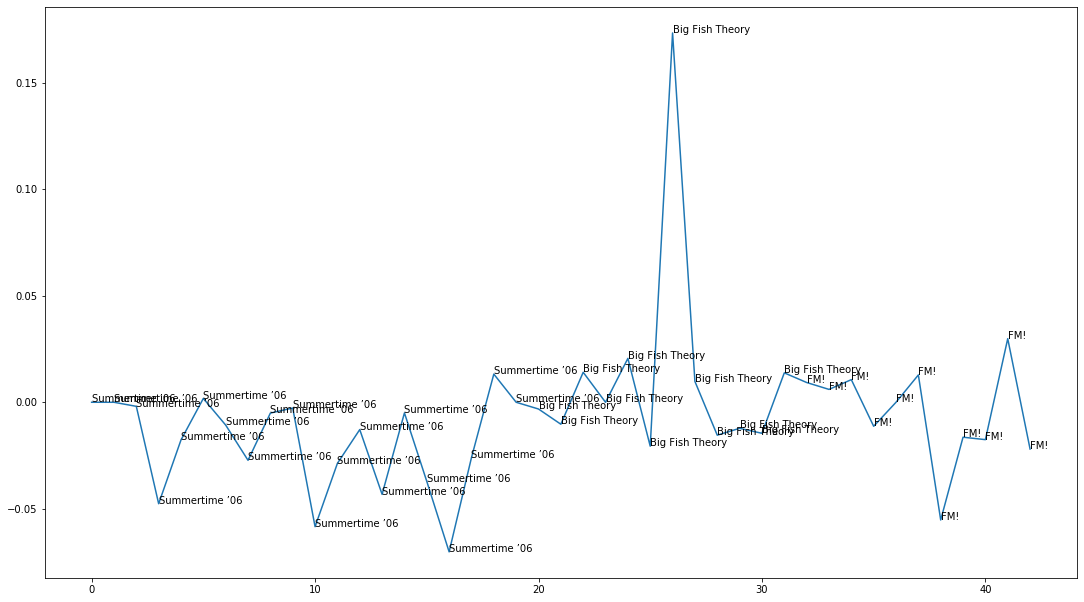

In [336]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
title = numpy.array([p["title"] for p in completeartist])

print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [337]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
Big Fish Theory,12.0,0.012941,0.052305,-0.020619,-0.012809,-0.001582,0.013874,0.173358
FM!,11.0,-0.004892,0.022949,-0.055258,-0.016969,0.000000,0.009948,0.029851
Summertime ’06,20.0,-0.018967,0.022629,-0.070218,-0.030788,-0.011767,-0.001434,0.013228


In [338]:
completeartist=load_artist("A$AP")

['Lyrics_A$APRocky{.LIVE-LOVE-A-AP.json', 'Lyrics_A$APRocky{.LONG-LIVE-A-AP.json', 'Lyrics_A$APRocky{.AT-LONG-LAST-A-AP.json', 'Lyrics_A$APRocky{.TESTING.json']


In [340]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print ()
#     print (song)
    print (song['title'])

    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Fine Whine
AT.LONG.LAST.A$AP
-0.06597938144329897
This love, this love, this love won't last forever
This love, this love, this love gon' own our eyes

This love, this love, this love won't last forever
And this love, and this love, and this love gon' own our

I think my cup is getting muddy, oh buddy
Is this that punch, drunk, and love it, no buggy?
Eyes bloody when we out in public
I'm hubby, she say she love me
Wasted money on syrup and honey, she think she Duffy
Then I became a druggy, enhanced my fame and money
And for your pain and suffering, my karma's waiting for me
Expecting payments from me
But she won't get a damn thing from me
She just might get a band-aid from me
You swear the Benz and these bands ain't from me

I know I'm a scumbag and now your heart broke
The night is still young, for you to sip and whine
(Slow, slow, slow) Lemme see you whine
(Slow, slow, slow, oh yeah)
I know your heart is broken, pick up your wine glass
With your fine ass, before you whine fast whine

In [342]:
for song in sorted_songs_artist[-10:]:
    print ()
    print (song['title'])
    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Peso
LIVE.LOVE.A$AP
0.010362694300518135
I be that pretty mothafucka, Harlem's what I'm reppin'
Tell my niggas quit the bitchin', we gon' make it in a second
Never disrespected plus I'm well connected
With this coke that I imported, just important as your President
Swagger so impressive and I don't need a necklace
But these bitches get impressed when you pull up in that 7
Them 6's, them Benzes, I gets get the freshest
Raf Simons, Rick Owens usually what I'm dressed in
Blowing blunts rolling doobies up, smoking sections
Groupies rush hold they boobies up, in my direction
Quit with all the fronting, you ain't 'round my clique for nothing
'Cause our presence is a present, just to kick it is a blessing

This is the way it goes, this is the way we roll
'Cause every day we on our pesos
This is the way it goes, this is the way we roll
'Cause every day we on our pesos
(Gun cock, gunshot, gonna lick a boy)
(Gun cock, gunshot, gonna lick a boy)
(Gun cock, gunshot, gonna lick a boy)
'Cause every

['LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.

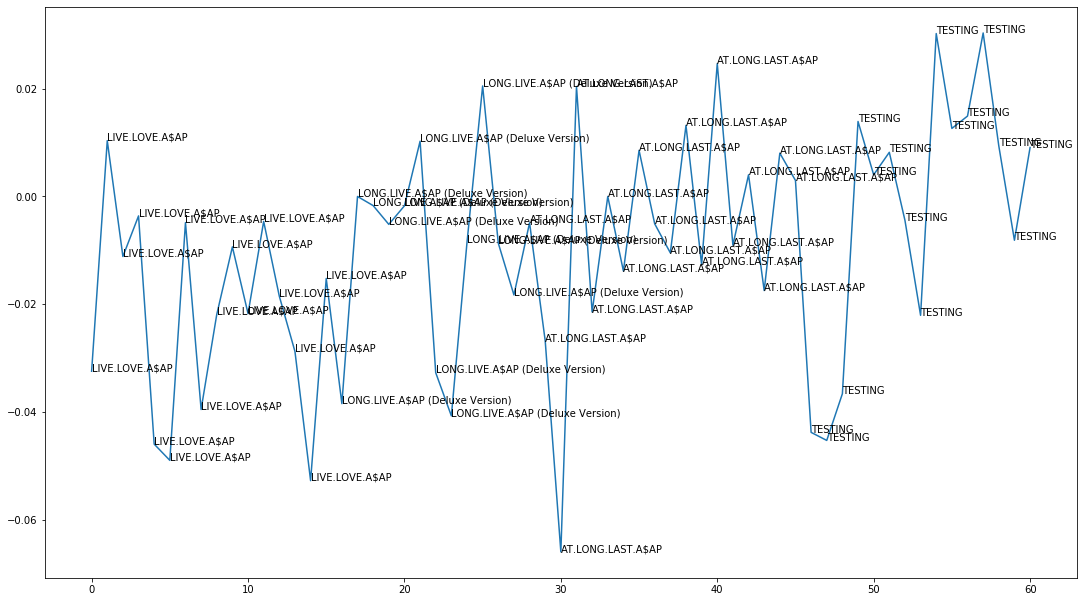

In [343]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
title = numpy.array([p["title"] for p in completeartist])

print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [344]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
AT.LONG.LAST.A$AP,18.0,-0.005881,0.020536,-0.065979,-0.013556,-0.004983,0.007034,0.024658
LIVE.LOVE.A$AP,16.0,-0.021821,0.018310,-0.052758,-0.034223,-0.020129,-0.008236,0.010363
LONG.LIVE.A$AP (Deluxe Version),12.0,-0.010437,0.018933,-0.040733,-0.021892,-0.006857,-0.001273,0.020513
TESTING,15.0,-0.001838,0.024639,-0.045292,-0.015101,0.008197,0.013276,0.030354
